# Közlekedési hálózatok vizsgálata
## Wikispeedia

A Wikispeedia böngészős játékban a játékos kap (vagy választ magának) két wikipédia cikket, amiknek a témája látszólag nagyon eltérő. A játék célja, hogy a felhasználó az egyik cikkből kiindulva, az oldalon található hivatkozások segítségével eljusson a másik kapott cikk oldalára.

In [2]:
import csv
from urllib.parse import unquote
import networkx as nx
import nbimporter
from functions import draw_normalized

In [8]:
def decomment(csvfile):
    for row in csvfile:
        raw = row.split('#')[0].strip()
        if raw: yield raw

# read successful paths
def read_path(start = None, end = None):
  check = True if (type(start) == str and type(end) == str) else False
  edges = {}
  with open("./wikispeedia_paths-and-graph/paths_finished.tsv") as paths:
      rd = csv.reader(decomment(paths), delimiter="\t", quotechar='"')
      for row in rd:

        # decode utf-8 and split path to list
        path = unquote(row[3]).split(sep=";")

        if (check):
           if (start != path[0] or end != path[len(path)-1]):
              continue

        # delete back clicks from path (represented by "<")
        j = 0
        while (j < len(path)):
            if (path[j] == "<"):
              del path[j]
              del path[j-1]
              j -= 2
            j += 1

        # make graph edges from paths (the weight is determined by the frequency of usage of an article pair)
        for i in range(len(path)-1):
          key_tuple = (path[i], path[i+1])
          if key_tuple in edges.keys():
            w = edges[key_tuple] + 1
          else:
            w = 1
          edges[key_tuple] = w
  return edges

In [4]:
wiki_edges = read_path()
wiki_graph = nx.Graph()
for k, v in wiki_edges.items():
    wiki_graph.add_edge(k[0], k[1], weight=v)
#nx.draw(wiki_graph, with_labels=True)

In [ ]:
draw_normalized(wiki_graph)

In [11]:
batman_edges = read_path("Batman", "Banana")
wiki_batman = nx.Graph()
for k, v in batman_edges.items():
    wiki_batman.add_edge(k[0], k[1], weight=v)

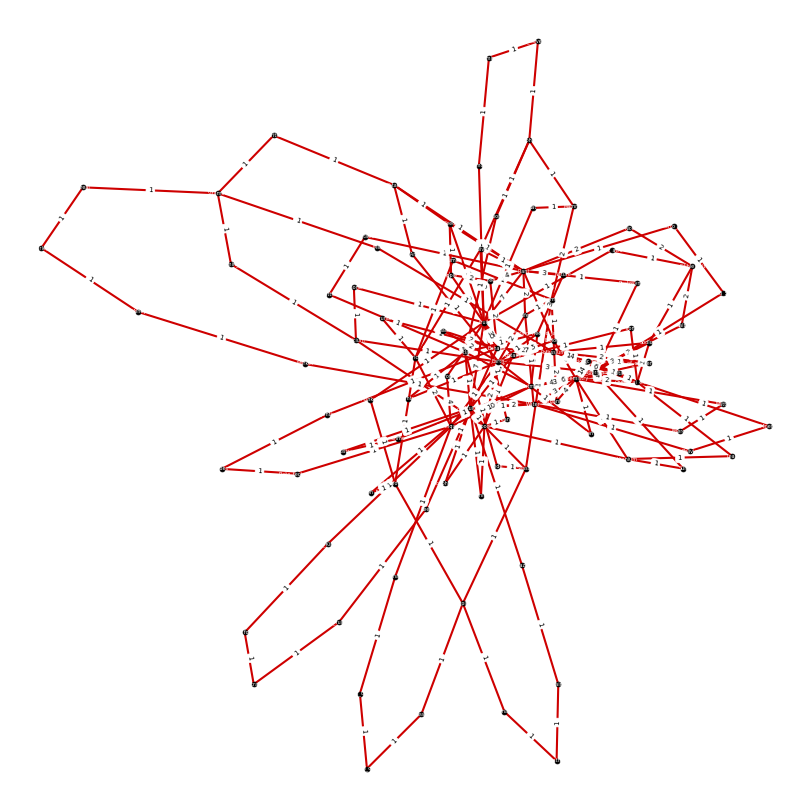

{'Batman': array([ 0.10398833, -0.02288665]),
 'Chemistry': array([ 0.19089049, -0.0036071 ]),
 'Biology': array([0.14768325, 0.09445545]),
 'Botany': array([0.0691678, 0.0569825]),
 'Food': array([ 0.01408149, -0.12504924]),
 'Season': array([ 0.09416745, -0.23325169]),
 'Animal': array([0.14364259, 0.19916707]),
 'Mammal': array([0.18642148, 0.437392  ]),
 'Bat': array([0.10750592, 0.43330542]),
 'Fruit': array([0.0128367 , 0.14036133]),
 'Banana': array([0.03848607, 0.07438165]),
 'Spring_Heeled_Jack': array([0.11644027, 0.11208019]),
 'Nature': array([0.16649832, 0.26293641]),
 'Plant': array([0.08934069, 0.27204802]),
 'Earthquake': array([-0.05032797, -0.12520204]),
 'Africa': array([-0.11898598,  0.05021108]),
 'Herbivore': array([0.00652925, 0.32734022]),
 'Burundi': array([-0.18373798,  0.15132732]),
 'California': array([-0.05821383,  0.00276086]),
 'Periodic_table': array([0.21307848, 0.04204514]),
 'Potassium': array([0.14678261, 0.06501338]),
 'Earth': array([0.04108327, 0

In [13]:
draw_normalized(wiki_batman, with_node_labels=True)